# **1A. Probability distributions**
<a target="_blank" href="https://colab.research.google.com/github/23wc01/CMPSC7540/blob/main/HW4/1A_Probability_distributions.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Sources

* https://colab.research.google.com/drive/1ZvRW-LBLhxFeSp_6a6T--HuP2GxAmFVK#scrollTo=pnvY7OJQMZ1d
* https://docs.scipy.org/doc/scipy/reference/stats.html
* https://www.geeksforgeeks.org/uniform-distribution-formula/
* https://www.geeksforgeeks.org/bernoulli-distribution-in-business-statistics-mean-and-variance/
* https://www.geeksforgeeks.org/gaussian-distribution-in-machine-learning/
* https://www.geeksforgeeks.org/poisson-distribution/
* https://www.geeksforgeeks.org/lognormal-distribution-in-business-statistics/

# **Installs & Imports**

## Note
`plt.hist(x_sample_datapoints, bins=interval_count, density=True)`

> `bins=interval_count`: Number of intervals(histogram bars) to split `x_sample_datapoints` into. Doing bins=interval_count-0.5` lets the histogram bar be center-aligned with integer on x-axis

> `density=True`: Normalizes historagram so area under curve = 1

In [ ]:
import numpy as np
from scipy.stats import bernoulli, uniform, poisson, norm, lognorm
import scipy.signal as signal
import matplotlib.pyplot as plt

# **Distributions**

## Bernoulli
Definition: For calculating probabilites w/ binary outcomes. Ex: Coin-flip has outcomes of head (1) or tails (0).

*Bernoulli probability distribution function*: calculates probability that random var X = specific x value (which can only be 1 or 0).

P(X=x) = p^x(1-p)^(1-x)
where x = 0 or 1 and 0 < p < 1

---
### Terms:

**Bernoulli trial**: 1 experiment/trial w/ only 2 possible outcomes.
**p/bernoulli parameter** = probability of 1 (success)

**q** = probability of 0 (failure). q = 1-p

**expected value (mean)**: E[X], Avg mean outcome in set of Bernoulli trials. In Bernoulli distributions, this is just probability of success.



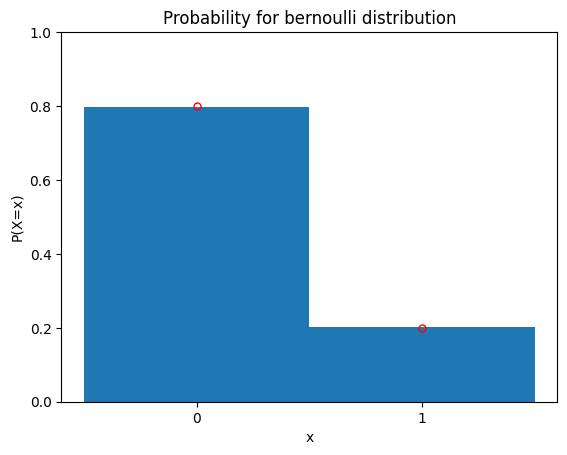

In [ ]:
p = 0.2 # probability of success (1)
x = bernoulli.rvs(p, size=1000) # Generate 1000 random samples w/ p success probability

xs = np.array([0, 1]) # Possible values
probability_mass_function = bernoulli.pmf(xs, p) # Probability of observing 0 or 1 based on p. Returns [1-q, p]

# PLOTTING
plt.figure()
plt.hist(x, bins=xs.size, range=(xs[0]-.5, xs[-1]+0.5), density=True)
plt.plot(xs, probability_mass_function, "ro",markersize=5,markerfacecolor="None")
plt.xticks(xs)
plt.ylim([0,1])
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.title("Probability for bernoulli distribution")
plt.show()

## Uniform
Definition: For when events have around equal likelihood of occuring. Ex: Fair die-roll will have equal probability of top-face being 1,2,3,4,5, or 6. Can be  discrete OR continuous uniform distribution (see "Terms" for more details)

Uniform distribution = U(a,b)

*Probability density function*: Probability of random continuous var falling within range a to b.
f(x) = 1 / (b - a), for a ≤ x ≤ b

and f(x) = 0 otherwise (bc will never have value fall outside a to b range).

---


Terms:

**a**: minimum

**b**: maximum

**Continuous Uniform distribution**: Infinite # of possible values in specific range because decimal values allowed. Ex: Random number generator

**Discrete Uniform distribution**: Finite # of possible values in specific range. Ex: Roll of a die.




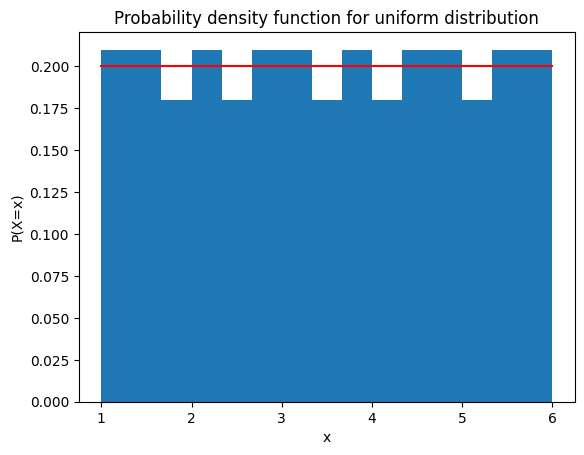

In [ ]:
a = 1
b = 6
x = np.linspace(a, b, 100) # Generate 100 samples within range a-b
uniform_distribution = uniform(loc=a,scale=(b-a)) # loc=start of distribution value, scale=width of distribution
probability_density_function = uniform_distribution.pdf(x) # 1 / (b - a)
plt.hist(x, bins=15, density=True)
# PLOTTING
plt.plot(x, probability_density_function, "r")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.title("Probability density function for uniform distribution")
plt.show()

## Poisson
Definition: For when event can occur multiple times within a given time and the probability of # of occurrences is unknown. Used when events are rare & # of occurrences is non-negative. Ex: Detection of defects in production

*Probability mass function* = P(X=k) = (e^(-λ) * λ^k) / k!

(probability of observing k events)

---


Terms:

* **λ** = avg. rate of event occurrence

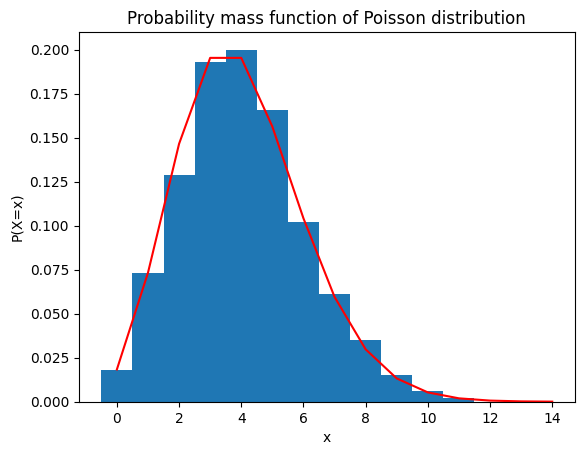

In [ ]:
λ = 4 # mean/avg
k = 15 # Poisson distribution accounts for small but non-zero chance of having a large # of occurrences that are far beyond λ. k is the bound to how much larger
samples = poisson.rvs(mu=λ, size=1000)
x = np.arange(0, k) # Return np array of ranges from 0 to k
probability_mass_function = poisson.pmf(x, λ) # (e^(-λ) * λ^k) / k!
plt.hist(samples, bins=np.arange(0,k)-0.5, density=True)
plt.plot(x, probability_mass_function, "r")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.title("Probability mass function of Poisson distribution")
plt.show()

## Gaussian/Normal
Definition: Continous probability distribution that is symetrical on either side. Events have higher probabilities of occuring around mean than around either sides of the mean. Ex: The grades of a class may follow a "bell-curve"

*Probability density function*
f(x) = 1/(σ*sqrt(2π) * e^(-((x-μ)^2)/(2σ^2))


---


Terms:

**mean** = μ

**standard deviation** = σ

**empirical rule/68-95-99.7 rule**: Returns proportion of data falling within certain intervals around the mean. Helps quickly estimate spread of data.
* mean ± 1σ = 68% of data fall within this range
* mean ± 2σ = 95% of data fall within this range
* mean ± 3σ = 99.7% of data fall within this range

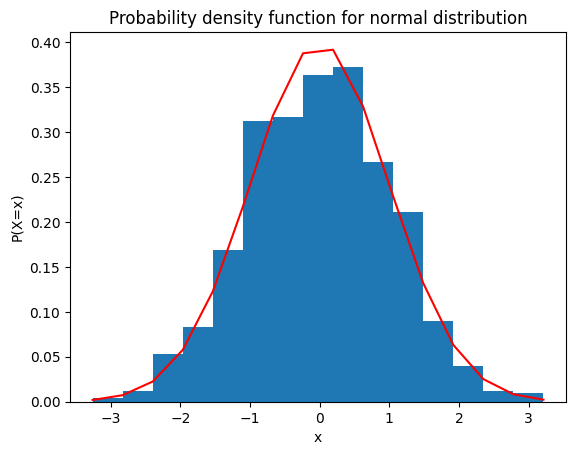

In [ ]:
μ = 0
σ = 1
x = norm.rvs(loc=μ, scale=σ, size=1000)
plt.figure()
_, xs, _ = plt.hist(x, bins=15, density=True)
probability_density_funciton = norm.pdf(xs, loc=μ, scale=σ) # 1/(σ*sqrt(2π) * e^(-((x-μ)^2)/(2σ^2))
plt.plot(xs, probability_density_funciton, "r") # Plot the curve
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.title("Probability density function for normal distribution")
plt.show()

## Log_normal
Definition: If natural log taken of variable's value, it follows a normal distribution. Distribution curve tilts to the right. Curve begins at 0, rises to maximum, then declines. With skewness increasing w/ σ and a μ kept constant  

*Probability Density Function*:  

f(x) = 1/(xσ*sqrt(2π) * e^(-1/2((ln(x)-μ)/σ)^2), where 0 < x < ∞.

---


Terms:

**mean** = μ, mean of natural log of data

**standard deviation** = σ, standard deviation of natural log of data

**q**: Lower & upper tail probability

**x**: quantiles


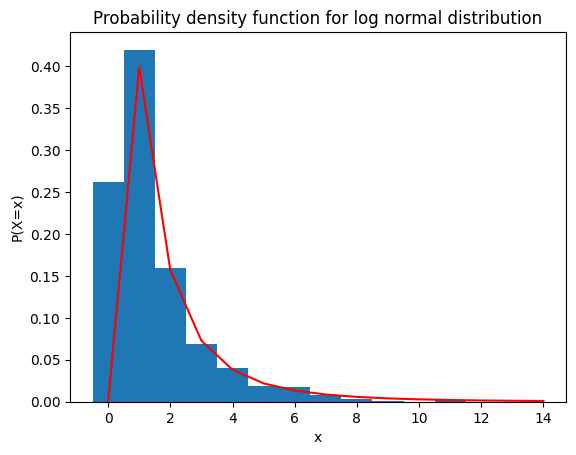

In [ ]:
μ = 1
σ = 0.5
samples = lognorm.rvs(s=μ, size=1000)
x = np.arange(0,15)
probability_density_function = lognorm.pdf(x, μ) #1/(xσ*sqrt(2π) * e^(-1/2((ln(x)-μ)/σ)^2)
plt.hist(samples,bins=np.arange(0,15)-0.5, density=True)
plt.plot(x, probability_density_function, "r")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.title("Probability density function for log normal distribution")
plt.show()